In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True

sb.set()

In [2]:
records = pd.read_csv('records.csv')

In [3]:
records.columns

Index(['Block Iterant', 'Block Max iterations', 'Block Steps',
       'Block Timeout [min]', 'Block Tolerance', 'Device', 'Domain partitions',
       'Exact solution', 'Executable name', 'Executable path', 'Info',
       'Initial guess', 'Iterant', 'Matrix', 'Max iterations', 'Nodes',
       'Processes', 'Processes grid', 'Processes per node', 'Rank',
       'Relative error', 'Relative residual', 'Steps', 'Threads per process',
       'Timeout [min]', 'Timestamp', 'Tolerance'],
      dtype='object')

In [4]:
records[['Timestamp', 'Nodes', 'Iterant', 'Block Steps']]

,Timestamp,Nodes,Iterant,Block Steps
0,2018-04-25 16:19:17,1.0,blockjacobi,1.0
1,2018-04-25 16:19:59,8.0,blockjacobi,1.0
2,2018-04-25 16:20:20,32.0,blockjacobi,1.0


In [5]:
df1 = pd.read_csv('2018-04-25_16-19-17.csv', index_col=0)
df8 = pd.read_csv('2018-04-25_16-19-59.csv', index_col=0)
df32 = pd.read_csv('2018-04-25_16-20-20.csv', index_col=0)

In [6]:
toma = pd.concat([df1.iloc[:,0],
                  df8.iloc[:,0],
                  df32.iloc[:,0]], axis=1)
toma.columns = ['Nodes 1', 'Nodes 8', 'Nodes 32']
toma.head()

,Nodes 1,Nodes 8,Nodes 32
Time [s],,,
0.000000,1.0,1.0,1.0
0.000018,NaN,NaN,NaN
0.000073,NaN,NaN,NaN
0.000078,NaN,NaN,NaN
0.000079,NaN,NaN,NaN


# Convergence

Text(0,0.5,'Relative error')

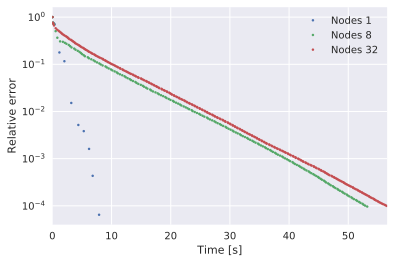

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
toma.iloc[::1].plot(ax=ax, logy=True, ms=5, style=['.', '.', '.'])
ax.set_ylabel('Relative error')

# fig.savefig('toma.png', dpi=300)

# Iteration rate

In [12]:
df32.count().mean() / df1.count().mean()

1.1848757172809534

In [15]:
toma['Nodes 1'].count()

15